In [2]:
import pandas as pd 

# read the collected data
df = pd.read_csv('amazon_earbuds.csv')

#check duplication
pd.concat(g for _, g in df.groupby("Asin") if len(g) > 1)

,Asin,Product Name,Price,Rating,Number of Rating
157,B01MG62Z5M,JBL Tune 110 – In-Ear Kopfhörer mit verwicklun...,"9,99","4,3 von 5 Sternen",22.452
198,B01MG62Z5M,JBL Tune 110 – In-Ear Kopfhörer mit verwicklun...,"9,99","4,3 von 5 Sternen",22.452
93,B07HS1V2QK,JBL Free X In Ear Bluetooth Kopfhörer in Schwa...,"74,99","4,2 von 5 Sternen",7.421
117,B07HS1V2QK,JBL Free X In Ear Bluetooth Kopfhörer in Schwa...,"74,99","4,2 von 5 Sternen",7.421
104,B07NVFBK7J,Active Noise Cancelling Kopfhörer A9 Bluetooth...,"29,99","4,5 von 5 Sternen",169.000
...,...,...,...,...,...
164,B09JQQDLXF,Neu Apple AirPods (3. Generation),"198,90","3,9 von 5 Sternen",154.000
52,B09KC97RZV,"Bluetooth Kopfhörer, In Ear Ohrhörer HiFi Spor...","19,99","4,5 von 5 Sternen",17.000
116,B09KC97RZV,"Bluetooth Kopfhörer, In Ear Ohrhörer HiFi Spor...","19,99","4,5 von 5 Sternen",17.000
268,B09KC97RZV,"Bluetooth Kopfhörer, In Ear Ohrhörer HiFi Spor...","19,99","4,5 von 5 Sternen",17.000


In [3]:
#remove duplicates by Asin 
df.drop_duplicates(subset=['Asin'], inplace = True) # now we have 250  rows instead of 381 as at the beginning
df

,Asin,Product Name,Price,Rating,Number of Rating
0,B08LGRK6MT,"Tiksounds Kopfhörer Kabellos, Bluetooth Kopfhö...","29,99","4,3 von 5 Sternen",1.981
1,B08FB2V4GR,"JBL Reflect Mini NC – Wasserdichte, True-Wirel...","99,99","4,0 von 5 Sternen",248.000
2,B08C5HYHYB,"Samsung Galaxy Buds Live, Kabellose Bluetooth-...","75,99","4,4 von 5 Sternen",15.521
3,B08KDZ2NZX,"Soundcore Life A1 In Ear Bluetooth Kopfhörer, ...","49,99","4,5 von 5 Sternen",3.627
4,B08832CDT9,"Amazon Brand - Eono Kabellose Ohrhörer, Eonobu...","29,99","4,1 von 5 Sternen",1.595
...,...,...,...,...,...
376,B098SNW1PJ,NURATRUE - True wireless earbuds with personal...,"229,00","4,1 von 5 Sternen",46.000
377,B097Q47KZ6,"TAA7306/00 Philips kabellose Sport Kopfhörer, ...","133,06","3,5 von 5 Sternen",4.000
378,B07W8G92L7,Philips In Ears Kopfhörer SHB2515WT/10 Kopfhör...,"35,98","4,1 von 5 Sternen",240.000
379,B099DNJD6T,"Taopod Bluetooth Kopfhörer, Bluetooth 5.1 Kopf...","25,99","4,6 von 5 Sternen",165.000


In [4]:
#now convert the datatypes of price, Rating and Number of Rating to numeric for analysis purpose
df["Price"] = df["Price"].astype(str).str.replace(',', '.')
df["Price"] = pd.to_numeric(df['Price'])

df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])
df["Rating"] = df["Rating"].astype(str).str.replace(',', '.')
df["Rating"] = pd.to_numeric(df['Rating'])

df["Number of Rating"] = df["Number of Rating"].astype(str).str.replace('.', '')
df["Number of Rating"] = pd.to_numeric(df['Number of Rating'])

<ipython-input-4-0b963dcc0db1>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Number of Rating"] = df["Number of Rating"].astype(str).str.replace('.', '')


In [5]:
#Print information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 380
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Asin              250 non-null    object 
 1   Product Name      250 non-null    object 
 2   Price             250 non-null    float64
 3   Rating            250 non-null    float64
 4   Number of Rating  250 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 11.7+ KB


In [6]:
#Analyze the prices of earbuds
df['Price'].describe()

count    250.00000
mean      73.25436
std       72.46441
min        6.79000
25%       29.99000
50%       41.19000
75%       92.49000
max      619.80000
Name: Price, dtype: float64

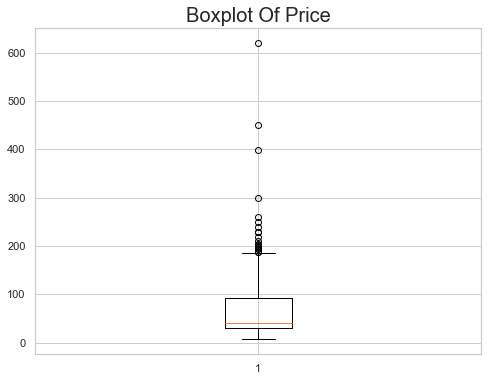

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(df['Price'])
plt.title("Boxplot Of Price", fontsize=20)
plt.savefig("boxplot.png") 
#We can see the range of price is between 6.79 Euro and 619.80 Euro, mean is 73.25 Euro
#and the distribution of price through boxplot

In [8]:
#Now see the most rated products
df.sort_values(['Number of Rating'],axis=0, ascending=False)[:10]

,Asin,Product Name,Price,Rating,Number of Rating
220,B07J2Z5DBM,TOZO T10 Bluetooth 5.0 Ohrhörer True Wireless ...,29.99,4.2,160276
37,B07RGZ5NKS,TOZO T6 Bluetooth Kopfhörer In Ear Touch Contr...,35.99,4.4,114378
14,B097BNRPLM,"Bluetooth Kopfhörer In Ear, Kabellose Bluetoot...",29.99,4.7,109104
13,B07PZR3PVB,Apple AirPods mit kabelgebundenem Ladecase,115.00,4.7,109104
182,B07ZPML7NP,Apple AirPods Pro,38.99,4.7,72317
157,B01MG62Z5M,JBL Tune 110 – In-Ear Kopfhörer mit verwicklun...,9.99,4.3,22452
15,B07MCGZK3B,Soundcore by Anker Liberty Neo Bluetooth Kopfh...,45.99,4.4,20956
282,B0748G1QLP,"Bose SoundSport Free, vollkommen kabellose Spo...",29.99,4.3,16234
2,B08C5HYHYB,"Samsung Galaxy Buds Live, Kabellose Bluetooth-...",75.99,4.4,15521
18,B0842QKN99,"Samsung Galaxy Buds +, Kabellose Kopfhörer, 3 ...",99.00,4.6,14787


In [9]:
#Analyse the Product's Rating 
#Find out which products are top rated
#assume that product which has more than 1000 of Ratings is more reliable 
data = df[df['Number of Rating'] > 5000]
top20 = data.sort_values(['Rating'],axis=0, ascending=False)[:20]
labels = list(top20['Asin'])

top20.iloc[1,0]

'B09J8HTDHX'

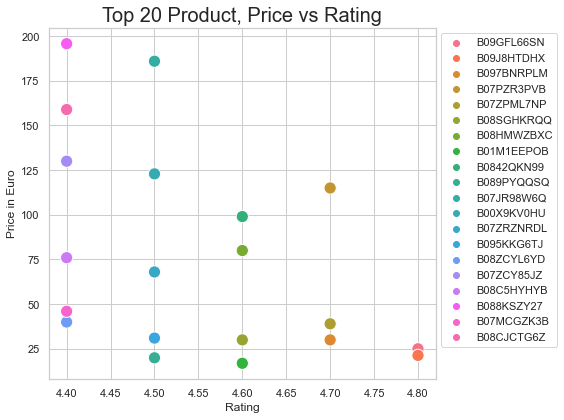

In [18]:
##### Now plot the top 20 products with Price and Rating
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize":(8, 6)})
sns.set_style("whitegrid")
sns.scatterplot(data=top20, x="Rating", y="Price", hue = 'Asin', s=150)
plt.legend(bbox_to_anchor=(1,1), loc = "upper left")
plt.title('Top 20 Product, Price vs Rating', fontsize=20)
plt.ylabel('Price in Euro')
plt.tight_layout()
plt.savefig("scatterplot.png") 